In [26]:
import numpy as np
import pandas as pd
import seaborn as sns

In [2]:
titanic=sns.load_dataset('titanic')

In [3]:
titanic.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


In [4]:
titanic.groupby(['sex','class'])['survived'].aggregate('mean')

sex     class 
female  First     0.968085
        Second    0.921053
        Third     0.500000
male    First     0.368852
        Second    0.157407
        Third     0.135447
Name: survived, dtype: float64

In [8]:
titanic.groupby(['sex','class'])['survived'].aggregate('mean').unstack()

class,First,Second,Third
sex,,,
female,0.968085,0.921053,0.500000
male,0.368852,0.157407,0.135447


In [6]:
titanic.pivot_table('survived',index='sex',columns='class')

class,First,Second,Third
sex,,,
female,0.968085,0.921053,0.500000
male,0.368852,0.157407,0.135447


In [13]:
pd.cut(titanic['age'][10:],[0,18,80])

10      (0.0, 18.0]
11     (18.0, 80.0]
12     (18.0, 80.0]
13     (18.0, 80.0]
14      (0.0, 18.0]
           ...     
886    (18.0, 80.0]
887    (18.0, 80.0]
888             NaN
889    (18.0, 80.0]
890    (18.0, 80.0]
Name: age, Length: 881, dtype: category
Categories (2, interval[int64, right]): [(0, 18] < (18, 80]]

In [14]:
titanic['age'][10:]

10      4.0
11     58.0
12     20.0
13     39.0
14     14.0
       ... 
886    27.0
887    19.0
888     NaN
889    26.0
890    32.0
Name: age, Length: 881, dtype: float64

In [17]:
age=pd.cut(titanic['age'],[0,18,80])

TypeError: ignored

In [19]:
titanic.pivot_table('survived',['sex',age],'class')
#Intervalo abierto es cuando NO tocas el valor correspondiente  (  )
#Intervalo cerrado es cuando SÍ tocas el valor correspondiente [  ]

class               First    Second     Third
sex    age                                   
female (0, 18]   0.909091  1.000000  0.511628
       (18, 80]  0.972973  0.900000  0.423729
male   (0, 18]   0.800000  0.600000  0.215686
       (18, 80]  0.375000  0.071429  0.133663

In [25]:
titanic.pivot_table(index=['sex',age],columns='class',aggfunc={'fare':sum,'survived':'mean'})

fare                        survived                    
class                First     Second      Third     First    Second     Third
sex    age                                                                    
female (0, 18]   1402.2167   350.9000   746.9459  0.909091  1.000000  0.511628
       (18, 80]  7773.2167  1273.4792   872.3417  0.972973  0.900000  0.423729
male   (0, 18]    573.1916   391.7542  1052.5918  0.800000  0.600000  0.215686
       (18, 80]  6612.2293  1698.4458  2024.5701  0.375000  0.071429  0.133663

In [29]:
###################
df=pd.read_csv('vehicles.csv')
df.head()

,Make,Model,Year,Engine Displacement,Cylinders,Transmission,Drivetrain,Vehicle Class,Fuel Type,Fuel Barrels/Year,City MPG,Highway MPG,Combined MPG,CO2 Emission Grams/Mile,Fuel Cost/Year
0,AM General,DJ Po Vehicle 2WD,1984,2.5,4.0,Automatic 3-spd,2-Wheel Drive,Special Purpose Vehicle 2WD,Regular,19.388824,18.0,17.0,17.0,522.764706,1950.0
1,AM General,FJ8c Post Office,1984,4.2,6.0,Automatic 3-spd,2-Wheel Drive,Special Purpose Vehicle 2WD,Regular,25.354615,13.0,13.0,13.0,683.615385,2550.0
2,AM General,Post Office DJ5 2WD,1985,2.5,4.0,Automatic 3-spd,Rear-Wheel Drive,Special Purpose Vehicle 2WD,Regular,20.600625,16.0,17.0,16.0,555.437500,2100.0
3,AM General,Post Office DJ8 2WD,1985,4.2,6.0,Automatic 3-spd,Rear-Wheel Drive,Special Purpose Vehicle 2WD,Regular,25.354615,13.0,13.0,13.0,683.615385,2550.0
4,ASC Incorporated,GNX,1987,3.8,6.0,Automatic 4-spd,Rear-Wheel Drive,Midsize Cars,Premium,20.600625,14.0,21.0,16.0,555.437500,2550.0


In [30]:
df.cov()
#vehicles.cov(numeric_only=True) 

,Year,Engine Displacement,Cylinders,Fuel Barrels/Year,City MPG,Highway MPG,Combined MPG,CO2 Emission Grams/Mile,Fuel Cost/Year
Year,108.679006,-0.950043,0.393463,-11.014201,8.193803,18.003093,11.564041,-295.561837,-253.905315
Engine Displacement,-0.950043,1.901329,2.093601,4.371182,-3.975230,-5.364729,-4.521839,118.400585,445.411783
Cylinders,0.393463,2.093601,3.089743,5.185271,-4.975236,-6.188204,-5.496614,140.120962,610.969531
Fuel Barrels/Year,-11.014201,4.371182,5.185271,16.330822,-14.001174,-19.837457,-16.251945,431.216029,1628.896929
City MPG,8.193803,-3.975230,-4.975236,-14.001174,14.991054,19.093859,16.561743,-380.886628,-1523.257041
Highway MPG,18.003093,-5.364729,-6.188204,-19.837457,19.093859,28.685151,22.556492,-539.698034,-2014.745627
Combined MPG,11.564041,-4.521839,-5.496614,-16.251945,16.561743,22.556492,18.917619,-441.844036,-1721.631290
CO2 Emission Grams/Mile,-295.561837,118.400585,140.120962,431.216029,-380.886628,-539.698034,-441.844036,11706.014825,44300.153209
Fuel Cost/Year,-253.905315,445.411783,610.969531,1628.896929,-1523.257041,-2014.745627,-1721.631290,44300.153209,209653.450389


In [33]:
df['Engine Displacement'].var()

1.9013288948848222

In [ ]:
#a=8.9 escalar
#a=[1.2,-5] ó [.2,-8,5.3,...] vector
#a=[[108,-9.2],[-9,1.9]] matriz

In [34]:
df.corr()

,Year,Engine Displacement,Cylinders,Fuel Barrels/Year,City MPG,Highway MPG,Combined MPG,CO2 Emission Grams/Mile,Fuel Cost/Year
Year,1.000000,-0.066091,0.021472,-0.261425,0.202987,0.322417,0.255021,-0.262025,-0.053189
Engine Displacement,-0.066091,1.000000,0.863782,0.784440,-0.744580,-0.726414,-0.753957,0.793623,0.705465
Cylinders,0.021472,0.863782,1.000000,0.729926,-0.730986,-0.657276,-0.718908,0.736733,0.759067
Fuel Barrels/Year,-0.261425,0.784440,0.729926,1.000000,-0.894838,-0.916544,-0.924630,0.986248,0.880316
City MPG,0.202987,-0.744580,-0.730986,-0.894838,1.000000,0.920766,0.983460,-0.909233,-0.859223
Highway MPG,0.322417,-0.726414,-0.657276,-0.916544,0.920766,1.000000,0.968300,-0.931360,-0.821563
Combined MPG,0.255021,-0.753957,-0.718908,-0.924630,0.983460,0.968300,1.000000,-0.938926,-0.864482
CO2 Emission Grams/Mile,-0.262025,0.793623,0.736733,0.986248,-0.909233,-0.931360,-0.938926,1.000000,0.894231
Fuel Cost/Year,-0.053189,0.705465,0.759067,0.880316,-0.859223,-0.821563,-0.864482,0.894231,1.000000


Correlación de Pearson (es la más "general"):

Suposiciones:

> Tus valores cumplen con una distrución normal, e.i. no hay outliers. Que tienen un comportamiendo de línea recta


> Son valores que tienden a ser continuos, e.i. no son cateǵoricos

In [35]:
df.corr(method='pearson')

,Year,Engine Displacement,Cylinders,Fuel Barrels/Year,City MPG,Highway MPG,Combined MPG,CO2 Emission Grams/Mile,Fuel Cost/Year
Year,1.000000,-0.066091,0.021472,-0.261425,0.202987,0.322417,0.255021,-0.262025,-0.053189
Engine Displacement,-0.066091,1.000000,0.863782,0.784440,-0.744580,-0.726414,-0.753957,0.793623,0.705465
Cylinders,0.021472,0.863782,1.000000,0.729926,-0.730986,-0.657276,-0.718908,0.736733,0.759067
Fuel Barrels/Year,-0.261425,0.784440,0.729926,1.000000,-0.894838,-0.916544,-0.924630,0.986248,0.880316
City MPG,0.202987,-0.744580,-0.730986,-0.894838,1.000000,0.920766,0.983460,-0.909233,-0.859223
Highway MPG,0.322417,-0.726414,-0.657276,-0.916544,0.920766,1.000000,0.968300,-0.931360,-0.821563
Combined MPG,0.255021,-0.753957,-0.718908,-0.924630,0.983460,0.968300,1.000000,-0.938926,-0.864482
CO2 Emission Grams/Mile,-0.262025,0.793623,0.736733,0.986248,-0.909233,-0.931360,-0.938926,1.000000,0.894231
Fuel Cost/Year,-0.053189,0.705465,0.759067,0.880316,-0.859223,-0.821563,-0.864482,0.894231,1.000000


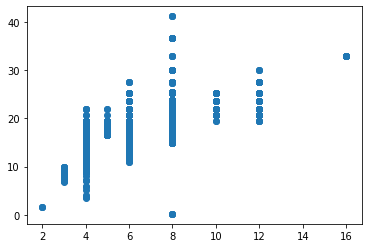

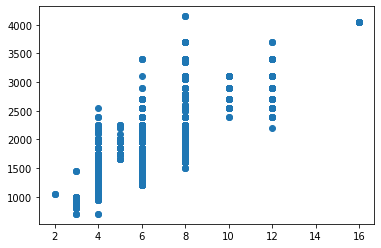

In [43]:
import matplotlib.pyplot as plt
plt.plot(df['Cylinders'],df['Fuel Barrels/Year'],'o')
plt.show()
plt.plot(df['Cylinders'],df['Fuel Cost/Year'],'o')

Correlación de Spearman:

> No necesariamente deben cumplir con una distribución normal

> de la misma manera que pearson, no es recomendable considerar variables categórcias

In [40]:
df.corr(method='spearman')

,Year,Engine Displacement,Cylinders,Fuel Barrels/Year,City MPG,Highway MPG,Combined MPG,CO2 Emission Grams/Mile,Fuel Cost/Year
Year,1.000000,-0.059030,-0.010617,-0.292432,0.222879,0.329993,0.273503,-0.294953,-0.086479
Engine Displacement,-0.059030,1.000000,0.912905,0.806148,-0.798772,-0.740036,-0.788520,0.809005,0.707265
Cylinders,-0.010617,0.912905,1.000000,0.774105,-0.791896,-0.691937,-0.763659,0.775528,0.764391
Fuel Barrels/Year,-0.292432,0.806148,0.774105,1.000000,-0.965545,-0.964023,-0.988268,0.995547,0.872089
City MPG,0.222879,-0.798772,-0.791896,-0.965545,1.000000,0.926348,0.981621,-0.969628,-0.889158
Highway MPG,0.329993,-0.740036,-0.691937,-0.964023,0.926348,1.000000,0.970229,-0.968546,-0.826033
Combined MPG,0.273503,-0.788520,-0.763659,-0.988268,0.981621,0.970229,1.000000,-0.991563,-0.882582
CO2 Emission Grams/Mile,-0.294953,0.809005,0.775528,0.995547,-0.969628,-0.968546,-0.991563,1.000000,0.873853
Fuel Cost/Year,-0.086479,0.707265,0.764391,0.872089,-0.889158,-0.826033,-0.882582,0.873853,1.000000


In [41]:
df.corr(method='pearson')-df.corr(method='spearman')

,Year,Engine Displacement,Cylinders,Fuel Barrels/Year,City MPG,Highway MPG,Combined MPG,CO2 Emission Grams/Mile,Fuel Cost/Year
Year,0.000000,-0.007061,0.032089,0.031006,-0.019892,-0.007576,-0.018482,0.032928,0.033290
Engine Displacement,-0.007061,0.000000,-0.049123,-0.021707,0.054192,0.013622,0.034563,-0.015382,-0.001800
Cylinders,0.032089,-0.049123,0.000000,-0.044178,0.060910,0.034662,0.044750,-0.038795,-0.005324
Fuel Barrels/Year,0.031006,-0.021707,-0.044178,0.000000,0.070707,0.047479,0.063638,-0.009298,0.008227
City MPG,-0.019892,0.054192,0.060910,0.070707,0.000000,-0.005583,0.001839,0.060395,0.029934
Highway MPG,-0.007576,0.013622,0.034662,0.047479,-0.005583,0.000000,-0.001930,0.037186,0.004471
Combined MPG,-0.018482,0.034563,0.044750,0.063638,0.001839,-0.001930,0.000000,0.052638,0.018100
CO2 Emission Grams/Mile,0.032928,-0.015382,-0.038795,-0.009298,0.060395,0.037186,0.052638,0.000000,0.020378
Fuel Cost/Year,0.033290,-0.001800,-0.005324,0.008227,0.029934,0.004471,0.018100,0.020378,0.000000


Correlación de Kendall Tau:

Se suele utilizar cuando se tienen "pocos" datos ( normalmente es <30)

cualquier distribución

In [44]:
df.corr(method='kendall')

,Year,Engine Displacement,Cylinders,Fuel Barrels/Year,City MPG,Highway MPG,Combined MPG,CO2 Emission Grams/Mile,Fuel Cost/Year
Year,1.000000,-0.042286,-0.006847,-0.209232,0.158733,0.235302,0.195772,-0.209409,-0.059315
Engine Displacement,-0.042286,1.000000,0.798525,0.640626,-0.645432,-0.563910,-0.622264,0.636453,0.539812
Cylinders,-0.006847,0.798525,1.000000,0.658234,-0.684961,-0.571367,-0.648971,0.653378,0.649602
Fuel Barrels/Year,-0.209232,0.640626,0.658234,1.000000,-0.909802,-0.888081,-0.972832,0.986167,0.741454
City MPG,0.158733,-0.645432,-0.684961,-0.909802,1.000000,0.818017,0.937261,-0.906752,-0.758913
Highway MPG,0.235302,-0.563910,-0.571367,-0.888081,0.818017,1.000000,0.898971,-0.886738,-0.668668
Combined MPG,0.195772,-0.622264,-0.648971,-0.972832,0.937261,0.898971,1.000000,-0.966545,-0.754136
CO2 Emission Grams/Mile,-0.209409,0.636453,0.653378,0.986167,-0.906752,-0.886738,-0.966545,1.000000,0.736060
Fuel Cost/Year,-0.059315,0.539812,0.649602,0.741454,-0.758913,-0.668668,-0.754136,0.736060,1.000000


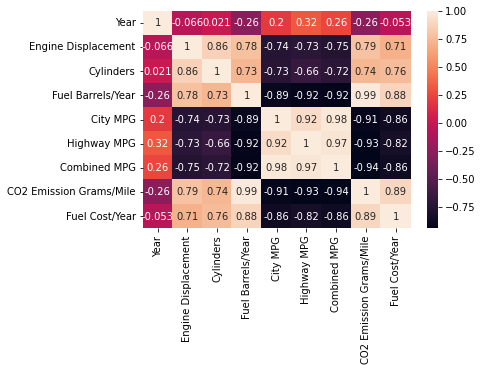

In [47]:
sns.heatmap(df.corr(),annot=True)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  """Entry point for launching an IPython kernel.


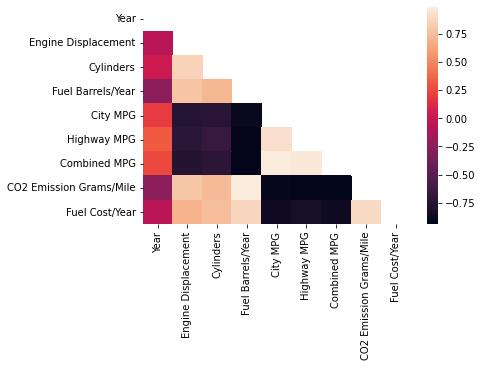

In [49]:
tri_inf=np.zeros_like(df.corr(),dtype=np.bool)
tri_inf[np.triu_indices_from(tri_inf)]=True

sns.heatmap(df.corr(),mask=tri_inf)